In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from category_encoders import OneHotEncoder
from sklearn.pipeline  import make_pipeline


In [2]:
df_mexico_1 = pd.read_csv('Data\mexico-real-estate-1.csv',encoding="ISO-8859-1")
df_mexico_2 = pd.read_csv('Data\mexico-real-estate-2.csv',encoding="ISO-8859-1")
df_mexico_3 = pd.read_csv('Data\mexico-real-estate-3.csv',encoding="ISO-8859-1")

In [3]:
print(df_mexico_1.info())
print('shape: ',df_mexico_1.shape)
df_mexico_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            583 non-null    float64
 4   lon            583 non-null    float64
 5   area_m2        700 non-null    int64  
 6   price_usd      700 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 38.4+ KB
None
shape:  (700, 7)


,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd
0,1,house,Estado de México,19.560181,-99.233528,150,"$67,965.56"
1,2,house,Nuevo León,25.688436,-100.198807,186,"$63,223.78"
2,3,apartment,Guerrero,16.767704,-99.764383,82,"$84,298.37"
3,4,apartment,Guerrero,16.829782,-99.911012,150,"$94,308.80"
4,5,house,Veracruz de Ignacio de la Llave,NaN,NaN,175,"$94,835.67"


In [4]:
print(df_mexico_2.info())
print('shape: ', df_mexico_2.shape)
df_mexico_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     700 non-null    int64  
 1   property_type  700 non-null    object 
 2   state          700 non-null    object 
 3   lat            571 non-null    float64
 4   lon            571 non-null    float64
 5   area_m2        700 non-null    int64  
 6   price_mxn      700 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 38.4+ KB
None
shape:  (700, 7)


,Unnamed: 0,property_type,state,lat,lon,area_m2,price_mxn
0,1,apartment,Nuevo León,25.721081,-100.345581,72,1300000
1,2,apartment,Puebla,NaN,NaN,190,2500000
2,3,house,Morelos,23.634501,-102.552788,360,5300000
3,4,house,Morelos,NaN,NaN,76,820000
4,5,house,Puebla,NaN,NaN,200,1100000


In [5]:
print(df_mexico_3.info())
print('shape :', df_mexico_3.shape)
df_mexico_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               700 non-null    int64  
 1   property_type            700 non-null    object 
 2   place_with_parent_names  700 non-null    object 
 3   lat-lon                  582 non-null    object 
 4   area_m2                  700 non-null    int64  
 5   price_usd                700 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 32.9+ KB
None
shape : (700, 6)


,Unnamed: 0,property_type,place_with_parent_names,lat-lon,area_m2,price_usd
0,1,apartment,|México|Distrito Federal|Gustavo A. Madero|Acu...,"19.52589,-99.151703",71,48550.59
1,2,house,|México|Estado de México|Toluca|Metepec|,"19.2640539,-99.5727534",233,168636.73
2,3,house,|México|Estado de México|Toluca|Toluca de Lerd...,"19.268629,-99.671722",300,86932.69
3,4,house,|México|Morelos|Temixco|Burgos Bugambilias|,NaN,275,263432.41
4,5,apartment,|México|Veracruz de Ignacio de la Llave|Veracruz|,"19.511938,-96.871956",84,68508.67


In [6]:
df_mexico_3['lat-lon'].str.split(',', expand=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       582 non-null    object
 1   1       582 non-null    object
dtypes: object(2)
memory usage: 11.1+ KB


In [7]:
def wrangle(*paths):

    for file_path in paths: 
        """
        Clean and preprocess the real estate data from a CSV file.

        This function performs the following operations:
        1. Reads the CSV file into a pandas DataFrame.
        2. Drops rows with NaN values.
        3. Cleans the 'price_usd' column by removing '$' and ',' characters and converting to float.
        4. Converts 'price_mxn' to USD if present, using an exchange rate of 1 USD = 19 MXN.
        5. Splits 'lat-lon' column into separate 'lat' and 'lon' columns if present.
        6. Extracts state information from 'place_with_parent_names' column if present.

        Parameters:
        filename (str): The path to the CSV file containing the real estate data.

        Returns:
        pandas.DataFrame: A cleaned and preprocessed DataFrame ready for analysis.
        """
        # Load the data
        df = pd.read_csv(file_path, encoding="ISO-8859-1")

        # Drop rows with missing values
        df.dropna(inplace=True)
        
        # Drop unnamed columns if they exist
        if 'Unnamed: 0' in df.columns:
            df.drop('Unnamed: 0', axis=1, inplace=True)

        # Remove $ and , and Convert 'price_usd' to float
        if 'price_usd'in df.columns:
            if df['price_usd'].dtype == 'object':
                 df['price_usd'] = df['price_usd'].str.replace('$', '').str.replace(',', '').astype(float)
        
        # Convert 'price_mxn' to usd and then to float
        if 'price_mxn' in df.columns:
            df['price_usd'] = df['price_mxn'] / 19
            df.drop('price_mxn', axis=1, inplace=True)
        
        # Handle lat-lon columns if it exists
        if 'lat-lon' in df.columns:
            df[['lat', 'lon']] = df['lat-lon'].str.split(',', expand=True)
            df.drop('lat-lon', axis=1, inplace=True)
        
        # Handle place_with_parent_name columns if it exists
        if 'place_with_parent_names' in df.columns:
            df['state'] = df['place_with_parent_names'].str.split('|').str[2]
            df.drop('place_with_parent_names', axis=1, inplace=True)

               
        
    return df

In [8]:
df_1 = wrangle('Data\mexico-real-estate-1.csv')
df_2 = wrangle('Data\mexico-real-estate-2.csv')
df_3 = wrangle('Data\mexico-real-estate-3.csv') 

# Concatenate the dataframes
df_mexico_cleaned = pd.concat([df_1, df_2, df_3])
print(df_mexico_cleaned.shape)
print(df_mexico_cleaned.info())
df_mexico_cleaned.head()

(1736, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 1736 entries, 0 to 699
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   object 
 3   lon            1736 non-null   object 
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 94.9+ KB
None


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
5,house,Yucatán,21.052583,-89.538639,205,105191.37


In [41]:
# Saving the cleaned data to a CSV file
df_mexico_cleaned.to_csv('Data\Mexico-real-estate-cleaned.csv', index=False)

In [10]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df_mexico_cleaned,
    lat= 'lat',
    lon= 'lon',
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

In [11]:
df_mexico_cleaned['state'].value_counts()

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
San Luis Potosí                     55
Chiapas                             55
Guerrero                            49
Tamaulipas                          48
Quintana Roo                        38
Baja California                     29
Sinaloa                             26
Chihuahua                           20
Tabasco                             20
Hidalgo                             17
Baja California Sur                 15
Sonora                              12
Guanajuato                          12
Aguascalientes                      10
Nayarit                              9
Durango                              7
Tlaxcala           

           area_m2      price_usd
count  1736.000000    1736.000000
mean    170.261521  115331.980800
std      80.594539   65426.173793
min      60.000000   33157.894737
25%     101.750000   65789.473684
50%     156.000000   99262.132105
75%     220.000000  150846.665000
max     385.000000  326733.660000


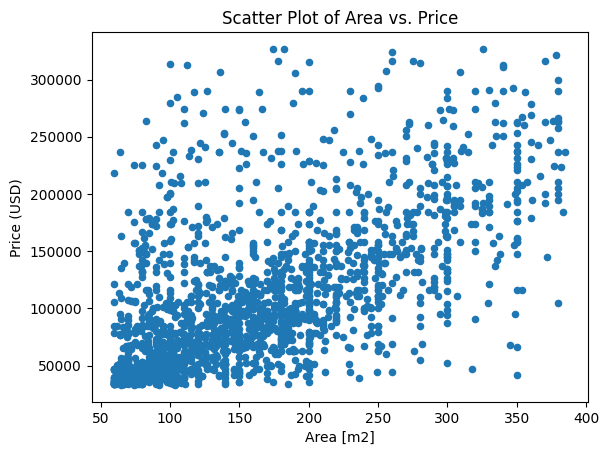

In [12]:
print(df_mexico_cleaned[['area_m2', 'price_usd']].describe())
df_mexico_cleaned[['area_m2', 'price_usd']].plot(kind='scatter', x='area_m2', y='price_usd')
plt.xlabel('Area [m2]')
plt.ylabel('Price (USD)')
plt.title('Scatter Plot of Area vs. Price');

array([[<Axes: title={'center': 'area_m2'}>,
        <Axes: title={'center': 'price_usd'}>]], dtype=object)

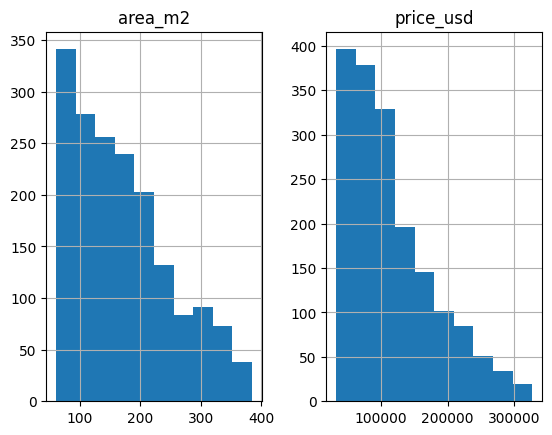

In [13]:
df_mexico_cleaned[['area_m2', 'price_usd']].hist()

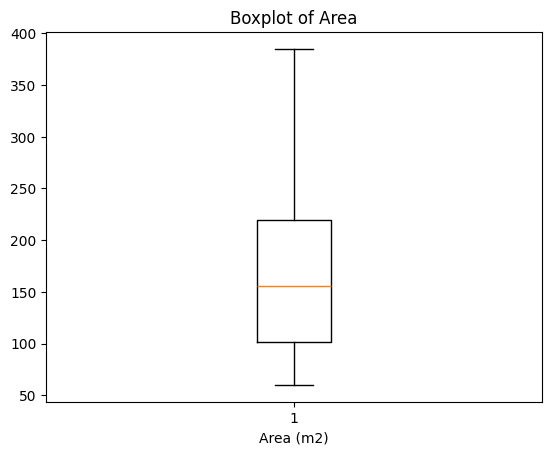

In [14]:
plt.boxplot(df_mexico_cleaned['area_m2'])
plt.title('Boxplot of Area')
plt.xlabel('Area (m2)')

plt.show()

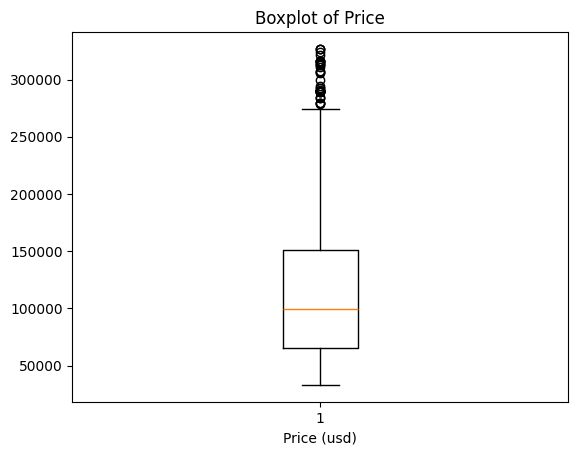

In [15]:
plt.boxplot(df_mexico_cleaned['price_usd'])
plt.title('Boxplot of Price')
plt.xlabel('Price (usd)')

plt.show()

# Research Question 1

**Which state has the most expensive real estate market?**

Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? During our exploratory data analysis, we used descriptive statistics like mean and median to get an idea of the "typical" house price in Mexico. Now, we need to break that calculation down by state and visualize the results. 

In [16]:
mean_price_per_state = df_mexico_cleaned.groupby('state')['price_usd'].mean().sort_values(ascending=False)
mean_price_per_state


state
Querétaro                          133955.913417
Guanajuato                         133277.965833
Nuevo León                         129221.985834
Distrito Federal                   128347.267365
Quintana Roo                       128065.415734
Chihuahua                          127073.851184
Jalisco                            123386.472237
Estado de México                   122723.490600
Campeche                           121734.633333
Puebla                             121732.974294
Guerrero                           119854.276015
Sonora                             114547.881798
Morelos                            112697.295615
Aguascalientes                     110543.888316
Baja California Sur                109069.339158
Yucatán                            108580.388526
Chiapas                            104342.313388
Veracruz de Ignacio de la Llave     96928.125254
Hidalgo                             94012.326563
Sinaloa                             93922.152490
Tamaulipas    

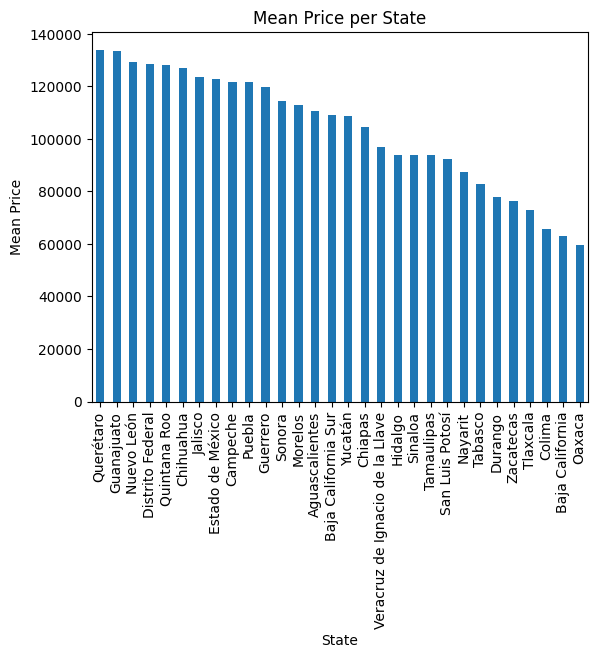

In [17]:
mean_price_per_state.plot(
    kind="bar",
    title="Mean Price per State",
    xlabel="State",
    ylabel="Mean Price",
);

In [18]:
df_mexico_cleaned['price_per_m2'] = df_mexico_cleaned['price_usd']/df_mexico_cleaned['area_m2']
df_mexico_cleaned.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
5,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


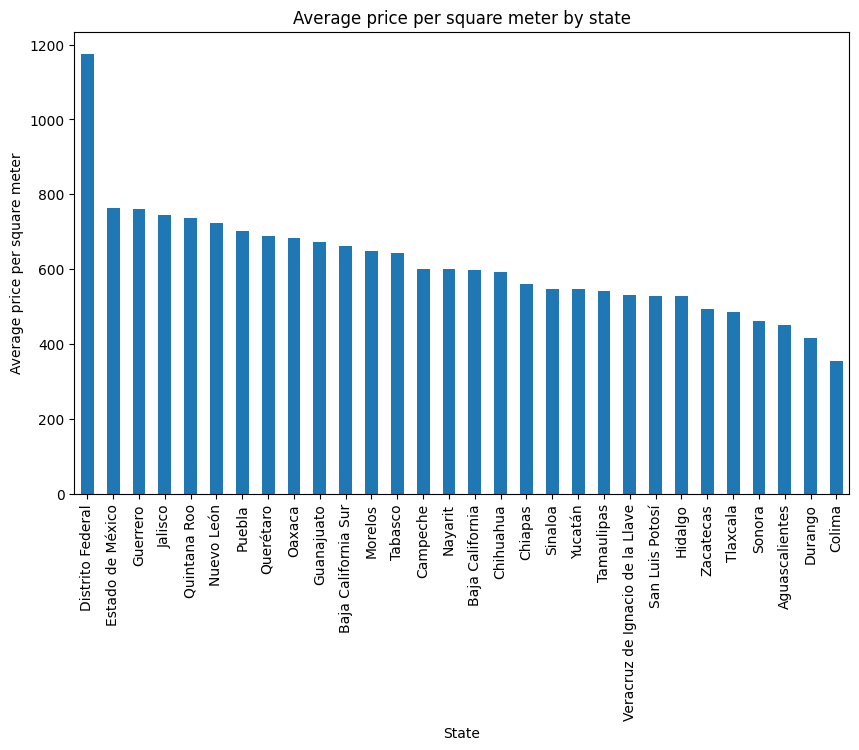

In [19]:
df_mexico_cleaned.groupby('state')['price_per_m2'].mean().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    title='Average price per square meter by state',
    xlabel='State',
    ylabel='Average price per square meter'
);

# Research Question 2

**Is there a relationship between home size and price?**

From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), but what about home size? Does the size of a house influence price?

Pearson Correlation =  0.5855182454266905


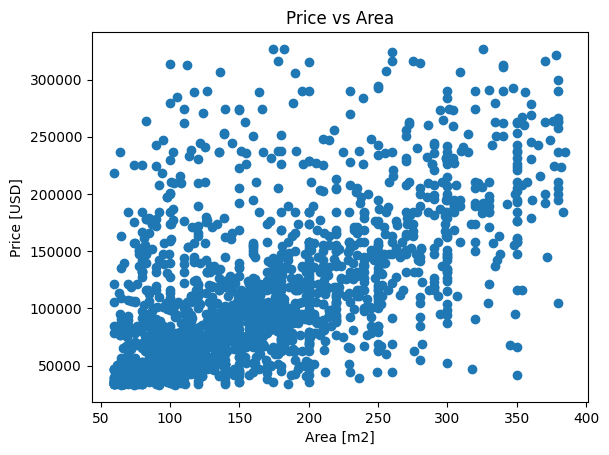

In [20]:
plt.scatter(
    x= df_mexico_cleaned['area_m2'], 
    y= df_mexico_cleaned['price_usd'],    
)
plt.xlabel('Area [m2]')
plt.ylabel('Price [USD]')
plt.title('Price vs Area');

print('Pearson Correlation = ', df_mexico_cleaned['area_m2'].corr(df_mexico_cleaned['price_usd']))